# Introduction
blabla

### Importation des modules nécessaires
On charge les modules essentiels pour le fonctionnement du code

In [9]:
import time
import math
import random
import numpy as np
import matplotlib.pyplot as plt

### Fonctions pour gérer matrices de coordonnées et distances
On implémente ici les fonctions auxiliaires pour aider le calcul est garder le code net. Les fonctions implémentés sont:
- Génératrice de villes,
- Calcul des distances entre points,
- Constructeur de matrice de distances.

In [10]:
# Générer matrice de coordonnées aléatoires
# Entrées: - n_cities : nombre de villes dans la réseau
#          - largeur : valeur maximale du coordonnées x
#          - hauteur : valeur maximale du coordonnées y
#          - seed : graine aléatoire
# Sorties: - matrix : matrice de coordonnées
def gen_villes(n_cities, largeur = 100, hauteur = 100, seed = 42):
    random.seed(seed)
    return [(random.uniform(0, largeur), random.uniform(0, hauteur)) for _ in range(n_cities)]


# Calculer la distance entre deux points
# Entrées: - p[1-2] : liste avec coordonnées du point 
# Sorties: - distance entre points
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


# Fonction pour construire matrice de distances
# Entrées: - villes : matrice de coordonnées
# Sorties: - matrice : matrice de distances
def constr_matrice_distances(villes):
    n = len(villes)                                 # Quantité de villes
    matrice = [[0.0] * n for _ in range(n)]         # Matrice carré initialisée à 0
    for i in range(n):
        for j in range(i + 1, n):
            d = distance(villes[i], villes[j])
            matrice[i][j] = d
            matrice[j][i] = d
    return matrice


# Fonction auxiliaire pour calculer la distance parcouru
# Entrées: - matrice : matrice de distance
#          - ordre : ordre de visite
# Sorties: - distance : distance parcouru
def longueur_chemin(matrice, ordre):
    distance = 0
    
    for i in range(len(ordre) - 1):
        distance += matrice[ordre[i]][ordre[i+1]]
        
    return distance

### Fonctions pour dessiner les résultats
Ici on implémente les fonctions pour dessiner les graphs qui représentent les résultats. On implémente:
- Fonction pour dessiner les villes sur un réseau,
- Fonction pour implementer un graphe orienté avec le parcours.

In [11]:
# Fonction pour dessiner un graph
# Entrées: - coords : matrice de coordonnées des villes
#          - radius : taille du point dans le graph
#          - connecte : décide si l'on ajoute les lignes
#          - embedded : décide si le graph est un image indépendant
#          - axis : axe à remplir si embedded est vrai
# Sorties: - l'image du graph
def afficher_villes(coords, radius=10, connecte=True, embedded=False, axis=None):
    # Si l'image est indépendant on cree la figure et ses axes
    if not embedded:
        fig, axis = plt.subplots()
    
    # On ajoute chaque ville au graph
    for i in range(len(coords)):
        circle = plt.Circle((coords[i][0], coords[i][1]), radius, color='blue', fill=True)
        axis.add_patch(circle)
    
        # Si connecté, on ajoute les lignes entre villes
        if connecte:
            for j in range(i + 1, len(coords)):
                x_values = [coords[i][0], coords[j][0]]
                y_values = [coords[i][1], coords[j][1]]
                axis.plot(x_values, y_values, color='black', linestyle='-')
    
    # Si l'image est indépendant on choisit ses propriétés
    if not embedded:
        axis.set_aspect('equal', 'box')
        axis.autoscale()
        plt.grid(True)
        plt.show()


# Fonction pour dessiner un graph orienté
# Entrées: - coords : matrice de coordonnées des villes
#          - ordre : ordre de parcours des villes
#          - radius : taille du point dans le graph
#          - embedded : décide si le graph est un image indépendant
#          - axis : axe à remplir si embedded est vrai
# Sorties: - l'image du graph
def afficher_chemin_oriente(coords, ordre, radius=10, embedded=False, axis=None):
    # Si l'image est indépendant on cree la figure et ses axes
    if not embedded:
        fig, axis = plt.subplots()
    
    # On ajoute chaque ville au graph. La première ville on ajoute en rouge
    for i in range(len(coords)):
        if i == ordre[0]:
            circle = plt.Circle((coords[i][0], coords[i][1]), radius, color='red', fill=True)
        else:
            circle = plt.Circle((coords[i][0], coords[i][1]), radius, color='blue', fill=True)
        axis.add_patch(circle)
    
    # Pour chaque ville, on ajoute une flèche connectant le parcours
    for j in range(len(ordre)-1):
        x_values = [coords[ordre[j]][0], coords[ordre[j+1]][0]]
        y_values = [coords[ordre[j]][1], coords[ordre[j+1]][1]]
        axis.annotate("", xytext=(coords[ordre[j]][0], coords[ordre[j]][1]), xy=(coords[ordre[j+1]][0], coords[ordre[j+1]][1]), arrowprops=dict(arrowstyle="->"))
    
    # Si l'image est indépendant on choisit ses propriétés
    if not embedded:
        axis.set_aspect('equal', 'box')
        axis.autoscale()
        plt.grid(True)
        plt.show()

# Algorithme Voisins plus proches
L'algorithme des voisins plus proches est un algorithme dit greedy, que vérifie pour toutes les villes quelle est la ville voisin plus proche que n'a été pas visitée. Avec ce schema, on obtient un parcours qui passe pour toutes les villes une fois, mais qui est pas forcement le plus optimale, parce que les résultats dépendent de la ville de départ.

## Implementation

In [12]:
# Algorithme des voisins plus proches
# Entrées: - map objet de réseau de villes
def voisins_plus_proches(distances, premiere = 0):
	n_cities = len(distances)
	visitee = [False for _ in range(n_cities)]
    # On cree une variable auxiliaire que vérifie si tous les villes ont été visitées
	tout_visite = False

	ville_courante = premiere
	visitee[ville_courante] = True

	distance_totale = 0
	ordre_visite = [premiere]
 
	# Si l'on a pas visité tous les villes, on continue
	while not tout_visite:
		# On choisit la ville courante
		meilleur_distance = float('inf')
		meilleur_voisin = None

		# On compare tous les voisins, chaque fois que la distance est inférieure, on
		# actualise le voisin
		for voisin in range(n_cities):
			if (voisin != ville_courante):
				distance = distances[ville_courante][voisin]
				if not visitee[voisin] and distance < meilleur_distance:
					meilleur_distance = distance
					meilleur_voisin = voisin

		# Après vérification de tous les voisins, on ajoute le voisin plus proche à
		# la liste et le marque comme visité. On met à jour l'indice courant
		distance_totale += meilleur_distance
		ordre_visite.append(meilleur_voisin)
		visitee[meilleur_voisin] = True
		ville_courante = meilleur_voisin
		
		# Si tous les villes sont visitées, on marque la variable comme vrai pour sortir
		# le boucle
		if all(visitee):
			tout_visite = True
   
	# Pour finir, on ajoute la première ville a la fin de la liste, pour fermer le parcours
	distance_totale += distances[ville_courante][premiere]
	ordre_visite.append(premiere)

	return distance_totale, ordre_visite

## Exemples
Le premier exemple présenté est une réseau de 50 villes générés de façon aléatoire avec le grain 30. L'algorithme de voisins porches est utilisé trois fois dans le même réseau mais avec différents points de départ. On vérifie que le parcours dépend du point de départ choisi et cela peut affecter l'optimalité de l'algorithme.

La distance parcouru avec début à la ville 0 est 669.164125317683
La distance parcouru avec début à la ville 23 est 715.6268061036874
La distance parcouru avec début à la ville 42 est 692.4364105981019
L'algoritme prendre en moyenne 0.00029961268107096356 secondes.


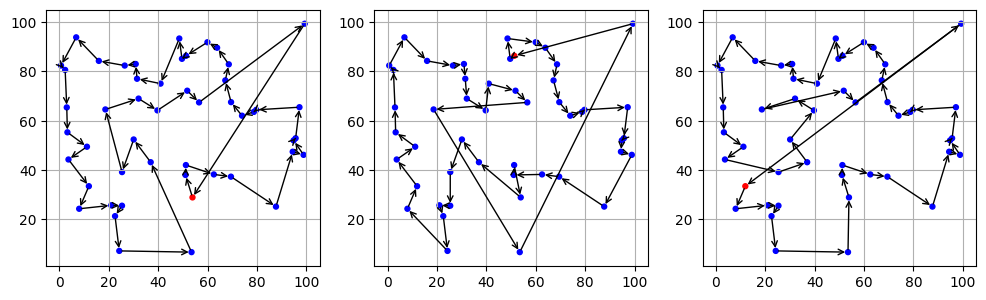

In [24]:
villes = gen_villes(50, seed=30)                                                    # Création du réseau
distances = constr_matrice_distances(villes)                                        # Matrice de distances
t_i = time.time()
distance_totale_1, ordre_visite_1 = voisins_plus_proches(distances, premiere=0)     # Premier appel
distance_totale_2, ordre_visite_2 = voisins_plus_proches(distances, premiere=23)    # Deuxième appel
distance_totale_3, ordre_visite_3 = voisins_plus_proches(distances, premiere=42)    # Troisième appel
t_f = time.time()
print(f"La distance parcouru avec début à la ville 0 est {distance_totale_1}")
print(f"La distance parcouru avec début à la ville 23 est {distance_totale_2}")
print(f"La distance parcouru avec début à la ville 42 est {distance_totale_3}")
print(f"L'algoritme prendre en moyenne {(t_f-t_i)/3} secondes.")

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
afficher_chemin_oriente(villes, ordre_visite_1, radius=1, embedded=True, axis=ax1)
afficher_chemin_oriente(villes, ordre_visite_2, radius=1, embedded=True, axis=ax2)
afficher_chemin_oriente(villes, ordre_visite_3, radius=1, embedded=True, axis=ax3)
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
ax3.set_aspect('equal', 'box')
ax1.autoscale()
ax2.autoscale()
ax3.autoscale()
plt.savefig("../Memoire/images/NN_50_villes_3departs.pdf", format="pdf", bbox_inches='tight')

# Algorithme 2-opt
L'algorithme 2-opt est un algorithme de optimisation du parcours. Il prendre comme entrée un parcours déjà obtenu (dans ce cas, on utilise le parcours donnée par les voisins plus proches) et vérifie chaque sous-parcours en vérifient s'il est possible d'optimiser le chemin en échangent des villes.

## Implementation

In [14]:
# Algorithme 2-opt pour optimizer voisins proches
# Entrées: - distances : matrice de distances entre villes
#          - distance_totale : distance parcouru avec l'algorithme précédent
#          - ordre_visite : ordre donné par l'algorithme précédent
# Sorties: - distance_totale : distance parcouru optimisé
#          - ordre_visite : ordre optimisé
def two_opt(distances, distance_totale, ordre_visite):
    # On considère l'état courant comme la solution optimale
    mellieur_distance = distance_totale
    nouvel_ordre = ordre_visite[:-1]
    n = len(nouvel_ordre)
    amelioree = True

    # On cherche des séquences à optimiser
    while amelioree:
        amelioree = False
        
        # À partir de chaque noeud on prendre de chaînes
        for i in range(1, n - 1):
            # Pour chaque chaîne on fait le échange avec son inverse
            for j in range(i + 1, n):
                ordre_inverse = nouvel_ordre[:i] + nouvel_ordre[i:j+1][::-1] + nouvel_ordre[j+1:]
                nouvelle_distance = longueur_chemin(distances, ordre_inverse + [ordre_inverse[0]])

                # Si le chemin parcouru est moins avec le chemin inversé, on le mettre à jour
                if nouvelle_distance < mellieur_distance:
                    nouvel_ordre = ordre_inverse
                    mellieur_distance = nouvelle_distance
                    amelioree = True
                    break
                
            if amelioree:
                break

    # Mis a jour du réseau
    ordre_visite = nouvel_ordre + [nouvel_ordre[0]]
    distance_totale = mellieur_distance

    return distance_totale, ordre_visite

## Exemples
Le premier exemple 2-opt prendre les résultats de l'exemple du voisins proches. Avec départ à partir de la ville 0, on utilise l'algorithme 2-opt pour trouver des parcours plus efficients.

La distance parcouru avec les voisins proches est 669.164125317683
La distance parcouru avec 2-opt est 610.0907229936818
VPP a pris 0.00044274330139160156 secondes.
2-opt a pris 0.07125020027160645 secondes.


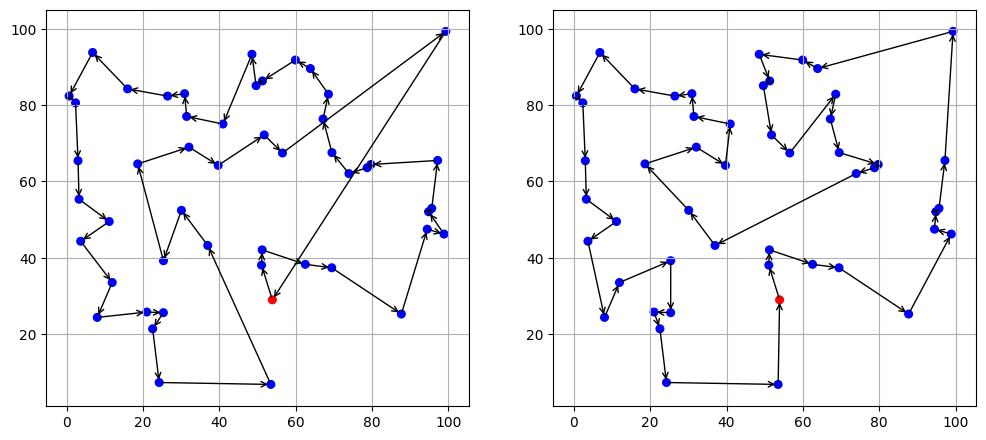

In [ ]:
villes = gen_villes(50, seed=30)                                                                # Création du réseau
distances = constr_matrice_distances(villes)                                                    # Matrice de distances
t_in = time.time()
distance_totale_nn, ordre_visite_nn = voisins_plus_proches(distances, premiere=0)               # Parcours NN
t_fn = time.time()
t_io = time.time()
distance_totale_2o, ordre_visite_2o = two_opt(distances, distance_totale_nn, ordre_visite_nn)   # Parcours 2-opt
t_fo = time.time()

print(f"La distance parcouru avec les voisins proches est {distance_totale_nn}")
print(f"La distance parcouru avec 2-opt est {distance_totale_2o}")
print(f"VPP a pris {t_fn-t_in} secondes.")
print(f"2-opt a pris {t_fo-t_io} secondes.")

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.grid(True)
ax2.grid(True)
afficher_chemin_oriente(villes, ordre_visite_nn, radius=1, embedded=True, axis=ax1)
afficher_chemin_oriente(villes, ordre_visite_2o, radius=1, embedded=True, axis=ax2)
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
ax1.autoscale()
ax2.autoscale()
plt.savefig("../Memoire/images/2opt_50_villes_nn.pdf", format="pdf", bbox_inches='tight')


On fait le même avec les parcours voisin proches avec départ de la ville 23 et 42. On voit que le résultat de l'algorithme 2-opt dépend aussi du parcours donnée par l'algorithme d'origine, mais dans tous les cas on obtient un parcours qui a pas des croisements, ce qu'optimise le parcours.

La distance parcouru avec les voisins proches (départ 23) est 715.6268061036874
La distance parcouru avec 2-opt (départ 23) est 607.7181148123196


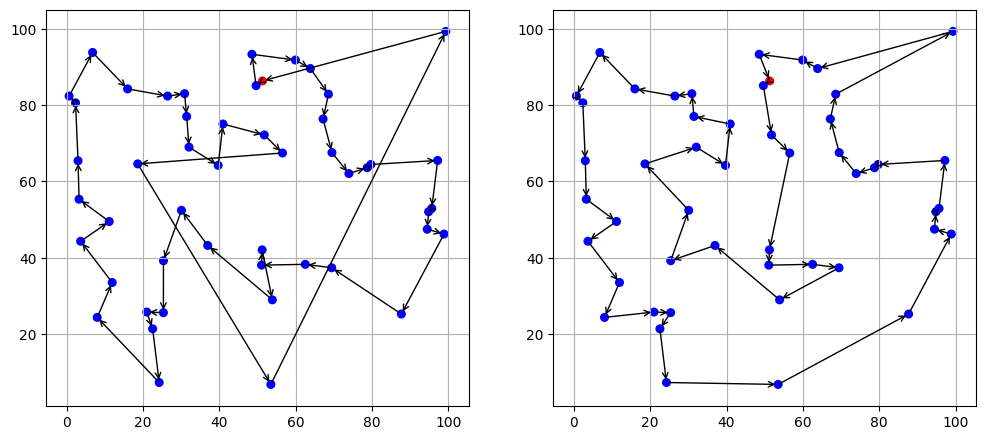

La distance parcouru avec les voisins proches (départ 42) est 692.4364105981019
La distance parcouru avec 2-opt (départ 42) est 609.9057237623452


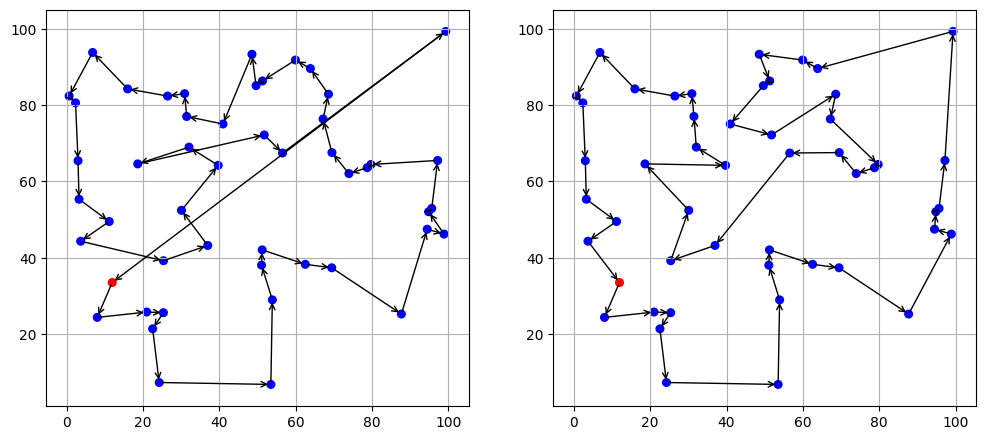

In [ ]:
villes = gen_villes(50, seed=30)                                                                            # Création du réseau
distances = constr_matrice_distances(villes)                                                                # Matrice de distances
distance_totale_nn_23, ordre_visite_nn_23 = voisins_plus_proches(distances, premiere=23)                    # Parcours NN
distance_totale_nn_42, ordre_visite_nn_42 = voisins_plus_proches(distances, premiere=42)                    # Parcours NN
distance_totale_2o_23, ordre_visite_2o_23 = two_opt(distances, distance_totale_nn_23, ordre_visite_nn_23)   # Parcours 2-opt
distance_totale_2o_42, ordre_visite_2o_42 = two_opt(distances, distance_totale_nn_42, ordre_visite_nn_42)   # Parcours 2-opt

print(f"La distance parcouru avec les voisins proches (départ 23) est {distance_totale_nn_23}")
print(f"La distance parcouru avec 2-opt (départ 23) est {distance_totale_2o_23}")

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.grid(True)
ax2.grid(True)
afficher_chemin_oriente(villes, ordre_visite_nn_23, radius=1, embedded=True, axis=ax1)
afficher_chemin_oriente(villes, ordre_visite_2o_23, radius=1, embedded=True, axis=ax2)
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
ax1.autoscale()
ax2.autoscale()
plt.savefig("../Memoire/images/2opt_50_villes_depart_23.pdf", format="pdf", bbox_inches='tight')
plt.show()

print(f"La distance parcouru avec les voisins proches (départ 42) est {distance_totale_nn_42}")
print(f"La distance parcouru avec 2-opt (départ 42) est {distance_totale_2o_42}")

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.grid(True)
ax2.grid(True)
afficher_chemin_oriente(villes, ordre_visite_nn_42, radius=1, embedded=True, axis=ax1)
afficher_chemin_oriente(villes, ordre_visite_2o_42, radius=1, embedded=True, axis=ax2)
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
ax1.autoscale()
ax2.autoscale()
plt.savefig("../Memoire/images/2opt_50_villes_depart_42.pdf", format="pdf", bbox_inches='tight')

# Heuristique d'Insertion
L'heuristique d'insertion est un algorithme qui permet d'insérer une ville dans un réseau en veillant à ce que celui ne soit pas désavantagé par la ville.
Sur le code ci-dessous, on génère des villes, calcule la distance entre deux points et on affiche le chemin.
J'ai ajouté des commandes qui permettent de calculer la distance totale ainsi que le temps de calcul pour chaque exemple de villes (j'ai fait 3 essais différents : 20, 50 et 100 villes).

## Implementation

In [17]:
# Algorithme heuristique d'insertion
# Entrées: - villes : matrice de coordonnées des villes
#          - matrice_distances : matrice de distances entre villes
# Sorties: - chemin_init : ordre optimisé
#          - distance_totale : distance parcouru optimisé
def heuristique_insert(villes, matrice_distances):
    n = len(villes)
    non_visitees = list(range(n))
    
    # On commence par 3 villes
    chemin_init = non_visitees[:3]                      
    non_visitees = non_visitees[3:]
    # fermer le cycle (retour à celle de départ)
    chemin_init.append(chemin_init[0])                  
    
    # tant qu'il reste des villes non visitées
    while non_visitees:
        meilleur_cout = float('inf') # coût d'insert minimal
        meilleure_ville = None
        meilleure_position = None
        
        # Ici on recherche la meilleure ville à insérer entre deux villes
        for ville in non_visitees:
            for i in range(1, len(chemin_init)):
                a = chemin_init[i - 1]
                b = chemin_init[i]
                cout = (
                    matrice_distances[a][ville] +
                    matrice_distances[ville][b] -
                    matrice_distances[a][b]
                )
                if cout < meilleur_cout:
                    meilleur_cout = cout
                    meilleure_ville = ville
                    meilleure_position = i
        
        # On l'insère au meilleur endroit
        chemin_init.insert(meilleure_position, meilleure_ville)
        non_visitees.remove(meilleure_ville)
    
    # On calcule la distance totale
    distance_totale = 0.0
    for i in range(len(chemin_init) - 1):
        distance_totale += matrice_distances[chemin_init[i]][chemin_init[i + 1]]

    return chemin_init, distance_totale

## Exemples
L'exemple suivant permet de calculer l'heuristique d'insertion avec 20 villes.

Distance totale : 355.04
- Temps de calcul : 0.000232 secondes


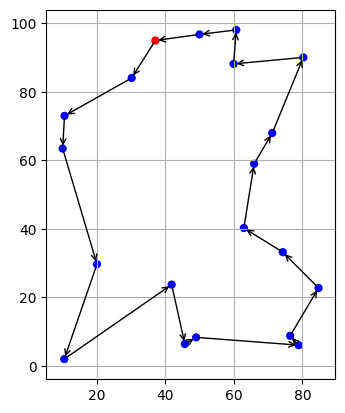

In [18]:
villes = gen_villes(20, seed=76) # On généère 20 villes aléatoires
matrice = constr_matrice_distances(villes) # On construit la matrice des distances
start_insert = time.time()
chemin_init, distance_totale = heuristique_insert(villes, matrice) # On calcul le chemin avec heuristique
end_insert = time.time()
temps_insert = end_insert - start_insert

print("Distance totale :", round(distance_totale, 2))
print("- Temps de calcul :", round(temps_insert, 6), "secondes")

fig, axis = plt.subplots()
afficher_chemin_oriente(villes, chemin_init, radius=1, embedded=True, axis=axis)
axis.set_aspect('equal', 'box')
axis.autoscale()
plt.grid(True)
plt.savefig("../Memoire/images/insertion_20_villes.pdf", format="pdf", bbox_inches='tight')
plt.show()

L'exemple suivant fait l'heuristique pour 100 villes et compare avec voisins plus proches.

Distance totale (insertion) : 930.16
- Temps de calcul (insertion) : 0.02347 secondes

Distance totale (voisins proches) : 1062.79
- Temps de calcul (voisins proches) : 0.00061 secondes


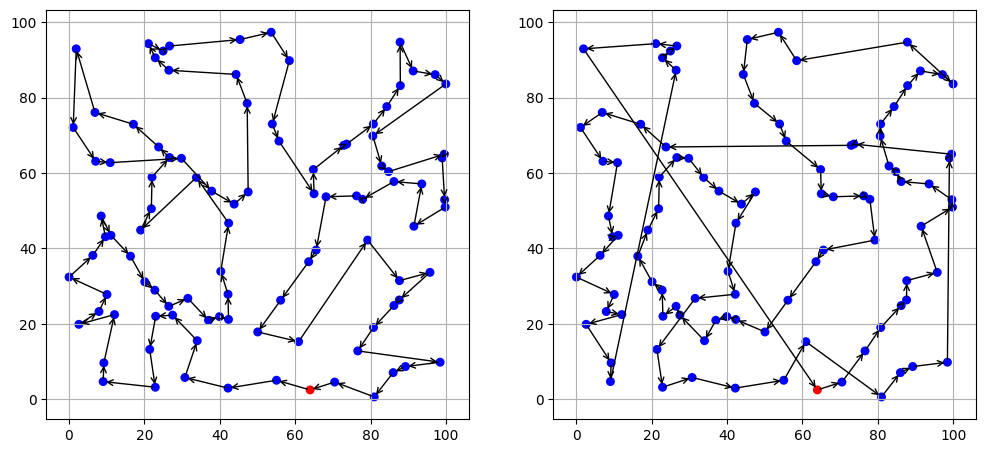

In [ ]:
villes = gen_villes(100)                                                           # Création du réseau
matrice = constr_matrice_distances(villes)                                         # Matrice de distances
start_insert = time.perf_counter()                                                 
chemin_init, distance_totale = heuristique_insert(villes, matrice)                 # Heuristique d'insert
end_insert = time.perf_counter()                                                   
temps_insert = end_insert - start_insert                                           # Calcul du temps

start_nn = time.perf_counter()
distance_totale_nn, ordre_visite_nn = voisins_plus_proches(matrice, premiere=0)    # Parcours NN
end_nn = time.perf_counter()
temps_nn = end_nn - start_nn

print("Distance totale (insertion) :", round(distance_totale, 2))
print("- Temps de calcul (insertion) :", round(temps_insert, 6), "secondes\n")
print("Distance totale (voisins proches) :", round(distance_totale_nn, 2))
print("- Temps de calcul (voisins proches) :", round(temps_nn, 6), "secondes")

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.grid(True)
ax2.grid(True)
afficher_chemin_oriente(villes, chemin_init, radius=1, embedded=True, axis=ax1)
afficher_chemin_oriente(villes, ordre_visite_nn, radius=1, embedded=True, axis=ax2)
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
ax1.autoscale()
ax2.autoscale()
plt.savefig("../Memoire/images/insertion_100_villes_nn.pdf", format="pdf", bbox_inches='tight')

# Recuit simulé
Le recuit simulé consiste à utiliser, ici, l'heuristique d'insertion et à l'améliorer en utilisant des solutions temporaires qui ne sont pas optimales pour éviter les minima-locaux.

## Implementation

In [20]:
# Génération d’un voisin

def gen_voisin(chemin):
    a, b = sorted(random.sample(range(1, len(chemin) - 1), 2))
    voisin = chemin[:a] + chemin[a:b][::-1] + chemin[b:]
    return voisin

# Algorithme Recuit simulé
# Entrées: - matrice_distances : matrice de distances entre villes
#          - chemin_initial : ordre donné par algorithme précédent
#          - temperature_initiale : contrôle la probabilité d'accepter des mauvaises solutions
#          - alpha : paramètre de diminution la temperature
#          - iterations_max : limite d'iterations a faire
# Sorties: - meilleur : retourne la meilleur solution trouvé
#          - meilleur_distance : retourne la meilleur distance trouvé
def recuit_simule(matrice_distances, chemin_initial, temperature_initiale=15000, alpha=0.9995, iterations_max=50000):
    courant = chemin_initial[:]                                         # On copie le chemin courant
    meilleur = courant[:]                                               # Meilleure solution 
    distance_courante = longueur_chemin(matrice_distances, courant)     # Distance de la solution courante
    meilleure_distance = distance_courante                              # On la considère comme la meilleur distance
    temperature = temperature_initiale                                  # Temperature initiale

    for _ in range(iterations_max):
        # Génère une solution voisine
        voisin = gen_voisin(courant) 
        distance_voisin = longueur_chemin(matrice_distances, voisin)
        delta = distance_voisin - distance_courante

        # Si la solution est meilleure, on l'accepte sinon, on peut l'accepter selon la température
        if delta < 0 or random.random() < math.exp(-delta / temperature):
            courant = voisin
            distance_courante = distance_voisin
            if distance_voisin < meilleure_distance:
                meilleur = voisin
                meilleure_distance = distance_voisin

        # On réduit la température
        temperature *= alpha 
        
        # On arrête si la température est trop basse
        if temperature < 1e-3:
            break 

    return meilleur, meilleure_distance

## Exemples
Le code ci-dessus permet de simuler l'exemple de recuit simulé avec 20 villes.

Distance après heuristique d'insertion : 897.78
 - Temps de calcul : 0.023781 secondes

Distance après recuit simulé : 865.26
Temps de calcul : 0.309871 secondes

Le recuit a amélioré la distance.


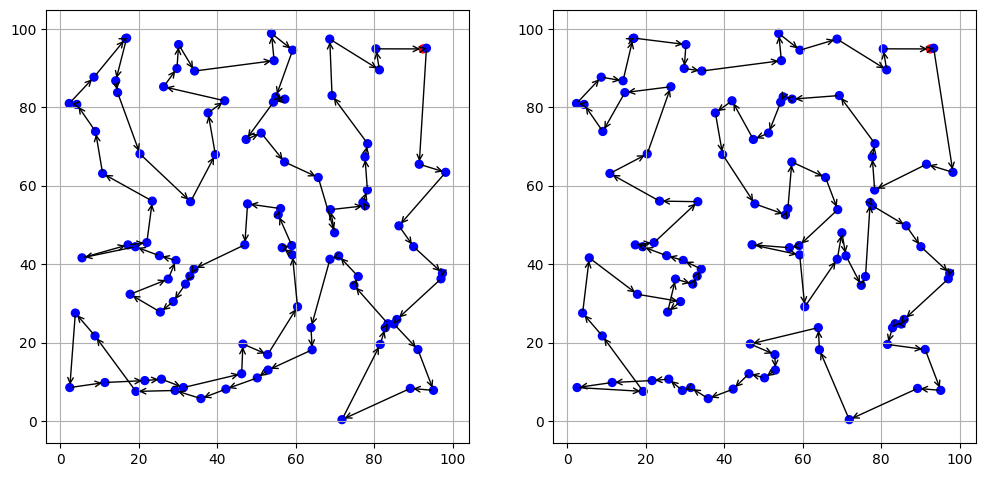

In [ ]:
villes = gen_villes(100, seed=23)                                               # Création du réseau
matrice = constr_matrice_distances(villes)                                      # Matrice de distances
start_insert = time.time()                                                      # Parcours NN
chemin_init, distance_insert = heuristique_insert(villes, matrice)              # Parcours NN
end_insert = time.time()                                                        # Parcours 2-opt
time_insert = end_insert - start_insert                                         # Parcours 2-opt

print("Distance après heuristique d'insertion :", round(distance_insert, 2))
print(" - Temps de calcul :", round(time_insert, 6), "secondes\n")

start_rs = time.time()                                                          
chemin_rs, distance_rs = recuit_simule(matrice, chemin_init)                    # Recuit simulé                                       
end_rs = time.time()                                                            
time_rs = end_rs - start_rs                                                     # Calcul du temps

print("Distance après recuit simulé :", round(distance_rs, 2))
print("Temps de calcul :", round(time_rs, 6), "secondes\n")

distance_init = longueur_chemin(matrice, chemin_init)                           # Vérifie si l'on a amélioré la distance
if round(distance_rs, 2) >= round(distance_init, 2):
    print("Le recuit n’a pas amélioré la distance.")
else:
    print("Le recuit a amélioré la distance.")

fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.grid(True)
ax2.grid(True)
afficher_chemin_oriente(villes, chemin_init, radius=1, embedded=True, axis=ax1)
afficher_chemin_oriente(villes, chemin_rs, radius=1, embedded=True, axis=ax2)
ax1.set_aspect('equal', 'box')
ax2.set_aspect('equal', 'box')
ax1.autoscale()
ax2.autoscale()
plt.savefig("../Memoire/images/recuit_simule.pdf", format="pdf", bbox_inches='tight')

# Comparaison entre algorithmes
Voici une comparaison entre les différents algorithmes utilisés. On compare les résultats obtenus, le temps qui prendre chaque calcul et la complexité temporelle de chaque algorithme

### Distance optimale

In [ ]:
# Génération des réseaux et matrices de distance
villes_10 = gen_villes(10, seed=3456)
villes_50 = gen_villes(50, seed=3456)
villes_100 = gen_villes(100, seed=3456)
villes_500 = gen_villes(500, seed=3456)
villes_1000 = gen_villes(1000, seed=3456)
distances_10 = constr_matrice_distances(villes_10)
distances_50 = constr_matrice_distances(villes_50)
distances_100 = constr_matrice_distances(villes_100)
distances_500 = constr_matrice_distances(villes_500)
distances_1000 = constr_matrice_distances(villes_1000)

# Application des heuristiques
d_tot_nn_10, ord_nn_10 = voisins_plus_proches(distances_10, premiere=0)
d_tot_nn_50, ord_nn_50 = voisins_plus_proches(distances_50, premiere=0)
d_tot_nn_100, ord_nn_100 = voisins_plus_proches(distances_100, premiere=0)
d_tot_nn_500, ord_nn_500 = voisins_plus_proches(distances_500, premiere=0)
d_tot_nn_1000, ord_nn_1000 = voisins_plus_proches(distances_1000, premiere=0)
d_tot_2o_10, ord_2o_10 = two_opt(distances_10, d_tot_nn_10, ord_nn_10)
d_tot_2o_50, ord_2o_50 = two_opt(distances_50, d_tot_nn_50, ord_nn_50)
# d_tot_2o_100, ord_2o_100 = two_opt(distances_100, d_tot_nn_100, ord_nn_100)
# d_tot_2o_500, ord_2o_500 = two_opt(distances_500, d_tot_nn_500, ord_nn_500)
# d_tot_2o_1000, ord_2o_1000 = two_opt(distances_1000, d_tot_nn_1000, ord_nn_1000)
ord_ih_10, d_tot_ih_10 = heuristique_insert(villes_10, distances_10)
ord_ih_50, d_tot_ih_50 = heuristique_insert(villes_50, distances_50)
ord_ih_100, d_tot_ih_100 = heuristique_insert(villes_100, distances_100)
ord_ih_500, d_tot_ih_500 = heuristique_insert(villes_500, distances_500)
ord_ih_1000, d_tot_ih_1000 = heuristique_insert(villes_1000, distances_1000)
ord_sa_10, d_tot_sa_10 = recuit_simule(distances_10, ord_ih_10)
ord_sa_50, d_tot_sa_50 = recuit_simule(distances_50, ord_ih_50)
ord_sa_100, d_tot_sa_100 = recuit_simule(distances_100, ord_ih_100)
ord_sa_500, d_tot_sa_500 = recuit_simule(distances_500, ord_ih_500)
ord_sa_1000, d_tot_sa_1000 = recuit_simule(distances_1000, ord_ih_1000)

# Résultats
print('N villes \t Voisins proches \t 2-opt \t\t\t Heuristique d\'insertion \t Recuit simulé')
print(f'10  \t\t {d_tot_nn_10}  \t {d_tot_2o_10}  \t {d_tot_ih_10} \t\t {d_tot_sa_10}')
print(f'50  \t\t {d_tot_nn_50}  \t {d_tot_2o_50}  \t {d_tot_ih_50} \t\t {d_tot_sa_50}')
print(f'100 \t\t {d_tot_nn_100} \t - \t\t\t {d_tot_ih_100} \t\t {d_tot_sa_100}')
print(f'500 \t\t {d_tot_nn_500} \t - \t\t\t {d_tot_ih_500} \t\t {d_tot_sa_500}')
print(f'1000 \t\t {d_tot_nn_1000} \t - \t\t\t {d_tot_ih_1000} \t\t {d_tot_sa_1000}')


N villes 	 Voisins proches 	 2-opt 			 Heuristique d'insertion 	 Recuit simulé
10  		 286.2587154150302  	 266.10426872029325  	 299.9324592218773 		 266.10426872029325
50  		 588.5158599285357  	 549.2188021764898  	 615.9451929468262 		 565.7999303748174
100 		 888.5622176529869 	 - 			 853.6044245488936 		 827.6085166924487
500 		 2099.853685838708 	 - 			 1936.8251119401082 		 1936.8251119401082
1000 		 2916.989111229981 	 - 			 2716.844343439646 		 2716.844343439646


### Complexité temporelle

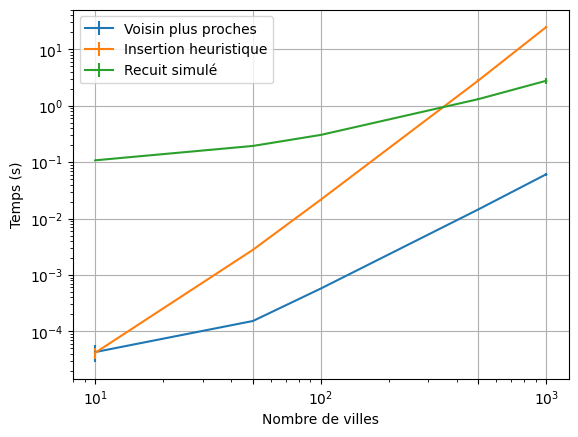

La pente de la courbe pour les voisins plus proches est 1.636477008277576
La pente de la courbe pour l'heuristique d'insertion est 2.902329168727981
La pente de la courbe pour le recuit simulé est 0.7211833149936527


In [ ]:
temps_10_nn = []
temps_50_nn = []
temps_100_nn = []
temps_500_nn = []
temps_1000_nn = []

# temps_10_2o = []
# temps_50_2o = []
# temps_100_2o = []
# temps_500_2o = []
# temps_1000_2o = []

temps_10_ih = []
temps_50_ih = []
temps_100_ih = []
temps_500_ih = []
temps_1000_ih = []

temps_10_sa = []
temps_50_sa = []
temps_100_sa = []
temps_500_sa = []
temps_1000_sa = []

n_iters = 5

# On applique les heuristique n fois
for i in range(n_iters):
    # Génération des réseaux et matrices de distance
    villes_10 = gen_villes(10, seed=random.randint(0,23000))
    villes_50 = gen_villes(50, seed=random.randint(0,23000))
    villes_100 = gen_villes(100, seed=random.randint(0,23000))
    villes_500 = gen_villes(500, seed=random.randint(0,23000))
    villes_1000 = gen_villes(1000, seed=random.randint(0,23000))
    distances_10 = constr_matrice_distances(villes_10)
    distances_50 = constr_matrice_distances(villes_50)
    distances_100 = constr_matrice_distances(villes_100)
    distances_500 = constr_matrice_distances(villes_500)
    distances_1000 = constr_matrice_distances(villes_1000)

    # Application des heuristiques
    t_i = time.time()
    d_tot_nn_10, ord_nn_10 = voisins_plus_proches(distances_10, premiere=0)
    t_f = time.time()
    temps_10_nn.append(t_f - t_i)
    t_i = time.time()
    d_tot_nn_50, ord_nn_50 = voisins_plus_proches(distances_50, premiere=0)
    t_f = time.time()
    temps_50_nn.append(t_f - t_i)
    t_i = time.time()
    d_tot_nn_100, ord_nn_100 = voisins_plus_proches(distances_100, premiere=0)
    t_f = time.time()
    temps_100_nn.append(t_f - t_i)
    t_i = time.time()
    d_tot_nn_500, ord_nn_500 = voisins_plus_proches(distances_500, premiere=0)
    t_f = time.time()
    temps_500_nn.append(t_f - t_i)
    t_i = time.time()
    d_tot_nn_1000, ord_nn_1000 = voisins_plus_proches(distances_1000, premiere=0)
    t_f = time.time()
    temps_1000_nn.append(t_f - t_i)

    # t_i = time.time()
    # d_tot_2o_10, ord_2o_10 = two_opt(distances_10, d_tot_nn_10, ord_nn_10)
    # t_f = time.time()
    # temps_10_2o.append(t_f - t_i)
    # t_i = time.time()
    # d_tot_2o_50, ord_2o_50 = two_opt(distances_50, d_tot_nn_50, ord_nn_50)
    # t_f = time.time()
    # temps_50_2o.append(t_f - t_i)
    # t_i = time.time()
    # d_tot_2o_100, ord_2o_100 = two_opt(distances_100, d_tot_nn_100, ord_nn_100)
    # t_f = time.time()
    # temps_100_2o.append(t_f - t_i)
    # t_i = time.time()
    # d_tot_2o_500, ord_2o_500 = two_opt(distances_500, d_tot_nn_500, ord_nn_500)
    # t_f = time.time()
    # temps_500_2o.append(t_f - t_i)
    # t_i = time.time()
    # d_tot_2o_100, ord_2o_100 = two_opt(distances_1000, d_tot_nn_1000, ord_nn_1000)
    # t_f = time.time()
    # temps_1000_2o.append(t_f - t_i)

    t_i = time.time()
    ord_ih_10, d_tot_ih_10 = heuristique_insert(villes_10, distances_10)
    t_f = time.time()
    temps_10_ih.append(t_f - t_i)
    t_i = time.time()
    ord_ih_50, d_tot_ih_50 = heuristique_insert(villes_50, distances_50)
    t_f = time.time()
    temps_50_ih.append(t_f - t_i)
    t_i = time.time()
    ord_ih_100, d_tot_ih_100 = heuristique_insert(villes_100, distances_100)
    t_f = time.time()
    temps_100_ih.append(t_f - t_i)
    t_i = time.time()
    ord_ih_500, d_tot_ih_500 = heuristique_insert(villes_500, distances_500)
    t_f = time.time()
    temps_500_ih.append(t_f - t_i)
    t_i = time.time()
    ord_ih_1000, d_tot_ih_1000 = heuristique_insert(villes_1000, distances_1000)
    t_f = time.time()
    temps_1000_ih.append(t_f - t_i)

    t_i = time.time()
    ord_sa_10, d_tot_sa_10 = recuit_simule(distances_10, ord_ih_10)
    t_f = time.time()
    temps_10_sa.append(t_f - t_i)
    t_i = time.time()
    ord_sa_50, d_tot_sa_50 = recuit_simule(distances_50, ord_ih_50)
    t_f = time.time()
    temps_50_sa.append(t_f - t_i)
    t_i = time.time()
    ord_sa_100, d_tot_sa_100 = recuit_simule(distances_100, ord_ih_100)
    t_f = time.time()
    temps_100_sa.append(t_f - t_i)
    t_i = time.time()
    ord_sa_500, d_tot_sa_500 = recuit_simule(distances_500, ord_ih_500)
    t_f = time.time()
    temps_500_sa.append(t_f - t_i)
    t_i = time.time()
    ord_sa_1000, d_tot_sa_1000 = recuit_simule(distances_1000, ord_ih_1000)
    t_f = time.time()
    temps_1000_sa.append(t_f - t_i)

# Calcul des moyennes et écart du temps
mean_10_nn = np.mean(temps_10_nn)
mean_50_nn = np.mean(temps_50_nn)
mean_100_nn = np.mean(temps_100_nn)
mean_500_nn = np.mean(temps_500_nn)
mean_1000_nn = np.mean(temps_1000_nn)
std_10_nn = np.std(temps_10_nn)
std_50_nn = np.std(temps_50_nn)
std_100_nn = np.std(temps_100_nn)
std_500_nn = np.std(temps_500_nn)
std_1000_nn = np.std(temps_1000_nn)

# mean_10_2o = np.mean(temps_10_2o)
# mean_50_2o = np.mean(temps_50_2o)
# mean_100_2o = np.mean(temps_100_2o)
# mean_500_2o = np.mean(temps_500_2o)
# mean_1000_2o = np.mean(temps_1000_2o)
# std_10_2o = np.std(temps_10_2o)
# std_50_2o = np.std(temps_50_2o)
# std_100_2o = np.std(temps_100_2o)
# std_500_2o = np.std(temps_500_2o)
# std_1000_2o = np.std(temps_1000_2o)

mean_10_ih = np.mean(temps_10_ih)
mean_50_ih = np.mean(temps_50_ih)
mean_100_ih = np.mean(temps_100_ih)
mean_500_ih = np.mean(temps_500_ih)
mean_1000_ih = np.mean(temps_1000_ih)
std_10_ih = np.std(temps_10_ih)
std_50_ih = np.std(temps_50_ih)
std_100_ih = np.std(temps_100_ih)
std_500_ih = np.std(temps_500_ih)
std_1000_ih = np.std(temps_1000_ih)

mean_10_sa = np.mean(temps_10_sa)
mean_50_sa = np.mean(temps_50_sa)
mean_100_sa = np.mean(temps_100_sa)
mean_500_sa = np.mean(temps_500_sa)
mean_1000_sa = np.mean(temps_1000_sa)
std_10_sa = np.std(temps_10_sa)
std_50_sa = np.std(temps_50_sa)
std_100_sa = np.std(temps_100_sa)
std_500_sa = np.std(temps_500_sa)
std_1000_sa = np.std(temps_1000_sa)

x_villes = [10,50,100,500,1000]
mean_nn = [mean_10_nn, mean_50_nn, mean_100_nn, mean_500_nn, mean_1000_nn]
std_nn = [std_10_nn, std_50_nn, std_100_nn, std_500_nn, std_1000_nn]
# mean_2o = [mean_10_2o, mean_50_2o, mean_100_2o]
# std_2o = [std_10_2o, std_50_2o, std_100_2o]
mean_ih = [mean_10_ih, mean_50_ih, mean_100_ih, mean_500_ih, mean_1000_ih]
std_ih = [std_10_ih, std_50_ih, std_100_ih, std_500_ih, std_1000_ih]
mean_sa = [mean_10_sa, mean_50_sa, mean_100_sa, mean_500_sa, mean_1000_sa]
std_sa = [std_10_sa, std_50_sa, std_100_sa, std_500_sa, std_1000_sa]

fig, ax = plt.subplots()
ax.errorbar(x_villes, mean_nn, std_nn,label= 'Voisin plus proches')
# ax.errorbar(x_villes, mean_2o, std_2o,label= '2-opt')
ax.errorbar(x_villes, mean_ih, std_ih,label= 'Insertion heuristique')
ax.errorbar(x_villes, mean_sa, std_sa,label= 'Recuit simulé')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xticks(x_villes)
ax.set_ylabel('Temps (s)')
ax.set_xlabel('Nombre de villes')
ax.legend()
plt.grid()
plt.savefig("../Memoire/images/complexite_temporelle.pdf", format="pdf", bbox_inches='tight')
plt.show()

# Régression polynomiale
p_nn = np.polyfit(np.log10(x_villes), np.log10(mean_nn), 1)
p_ih = np.polyfit(np.log10(x_villes), np.log10(mean_ih), 1)
p_sa = np.polyfit(np.log10(x_villes), np.log10(mean_sa), 1)

print(f"La pente de la courbe pour les voisins plus proches est {p_nn[0]}")
print(f"La pente de la courbe pour l'heuristique d'insertion est {p_ih[0]}")
print(f"La pente de la courbe pour le recuit simulé est {p_sa[0]}")
    